In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
data = pd.read_csv('medical_cost.csv')
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.shape

(1338, 8)

In [23]:
data.dtypes

Id            int64
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [9]:
data.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
data['sex'].replace({'female':0 , 'male': 1}, inplace=True) 
data['smoker'].replace({'no':0 , 'yes': 1}, inplace=True) 

In [39]:
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,southwest,16884.92400
1,2,18,1,33.770,1,0,southeast,1725.55230
2,3,28,1,33.000,3,0,southeast,4449.46200
3,4,33,1,22.705,0,0,northwest,21984.47061
4,5,32,1,28.880,0,0,northwest,3866.85520


In [32]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [33]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
df_region = pd.get_dummies(data['region'])
df_region= df_region.astype('int')
df_region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [42]:
data =  pd.concat([data, df_region], axis=1)
data.head()

,Id,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,1,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,2,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,3,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,4,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,5,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


In [50]:
data= data.drop(['region'], axis=1)

In [51]:
data.head()

,Id,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,1,19,0,27.900,0,1,16884.92400,0,0,0,1
1,2,18,1,33.770,1,0,1725.55230,0,0,1,0
2,3,28,1,33.000,3,0,4449.46200,0,0,1,0
3,4,33,1,22.705,0,0,21984.47061,0,1,0,0
4,5,32,1,28.880,0,0,3866.85520,0,1,0,0


In [52]:
data = data.reindex(columns=['Id','age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest','charges'])
data.head()

,Id,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,1,19,0,27.900,0,1,0,0,0,1,16884.92400
1,2,18,1,33.770,1,0,0,0,1,0,1725.55230
2,3,28,1,33.000,3,0,0,0,1,0,4449.46200
3,4,33,1,22.705,0,0,0,1,0,0,21984.47061
4,5,32,1,28.880,0,0,0,1,0,0,3866.85520


In [83]:
x = data[data.columns[1:-1]]
y = data[data.columns[-1]]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)


In [73]:
x

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [82]:
x.shape

(1338, 9)

In [84]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [85]:
y.shape

(1338, 1)

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state =42)


In [92]:
model = LinearRegression()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [102]:
print(pred[100])
print(ytest[100])

[5407.76752001]
[4527.18295]


In [95]:
testscore = model.score(xtest, ytest)
print('test score: ',testscore)

trainscore = model.score(xtrain, ytrain)
print('train score: ',trainscore)

test score:  0.7835929767120723
train score:  0.7417255854683333


In [103]:
df = pd.DataFrame(data={'Predicted Values': pred.flatten(), 'Actual Values': ytest.flatten()})
df.head(25)

,Predicted Values,Actual Values
0,8969.550274,9095.06825
1,7068.747443,5272.17580
2,36858.410912,29330.98315
3,9454.678501,9301.89355
4,26973.173457,33750.29180
5,10864.113164,4536.25900
6,170.280841,2117.33885
7,16903.450287,14210.53595
8,1092.430936,3732.62510
9,11218.343184,10264.44210


In [98]:
from sklearn.metrics import r2_score

In [104]:
score = r2_score(pred, ytest)
print('Score:', score*100)

Score: 70.88351277198348


In [127]:
data.corr()

,Id,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
Id,1.000000,-0.031467,0.003704,-0.036169,0.025221,0.005217,-0.004905,0.020966,-0.022932,0.007732,-0.003373
age,-0.031467,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
sex,0.003704,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
bmi,-0.036169,0.109272,0.046371,1.000000,0.012759,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.025221,0.042469,0.017163,0.012759,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,0.005217,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
northeast,-0.004905,0.002475,-0.002425,-0.138156,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
northwest,0.020966,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
southeast,-0.022932,-0.011642,0.017117,0.270025,-0.023066,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
southwest,0.007732,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210


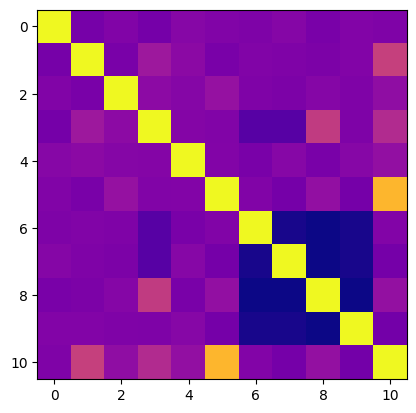

In [151]:
plt.imshow(data.corr(),cmap='plasma',filterrad=4)


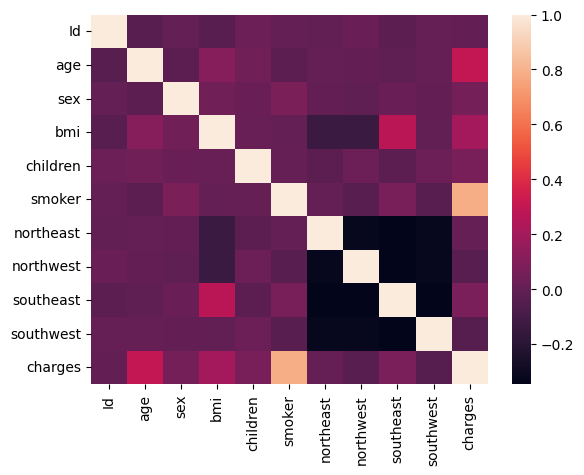

In [138]:
sns.heatmap(data.corr(), annot=None)
plt.show()

In [149]:
data.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest', 'charges'],
      dtype='object')